# **Name : Sanjana gaherwar**

# Task1 of the machine learning internship

*Movie Genre Description*: Built a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. By using techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machine.

Batch: P12

Date of submission: 25 November 2023

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# **Data Exploration**

We load the respective files provided, then firstly we rread the text file, and store it as a csv file
We use triple colons (:::) as a delimiter and store the result in four columns: 'ID', 'TITLE', 'GENRE', and 'DESCRPTION'.
And then explore those csv files

# *For "train_data" file*

In [4]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())

<ipython-input-4-b9841be284ae>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
display(train_data.tail())

,ID,TITLE,GENRE,DESCRIPTION
4757,4758,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ..."
4758,4759,Kamerayla Izdivac (2010),documentary,The film shows us the unknown face of TV worl...
4759,4760,Lost: 2010 PaleyFest (2010),talk-show,The exclusive release of the PaleyFest2010 li...
4760,4761,Oy Vey! My Son Is Gay!! (2009),comedy,A romantic comedy featuring a Jewish family w...
4761,4762,"Sergio Leone: Cinema, Cinema (2001)",documentary,"Despite his short filmography, Sergio Leone i..."


In [6]:
print(train_data.shape)

(4762, 4)


In [32]:
train_data.isna().sum()

ID                    0
TITLE                 0
GENRE                 0
DESCRIPTION           0
DESCRIPTION_length    0
dtype: int64

In [15]:
train_data.describe()

,ID
count,4762.000000
mean,2381.500000
std,1374.815321
min,1.000000
25%,1191.250000
50%,2381.500000
75%,3571.750000
max,4762.000000


In [19]:
train_data['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

# *For "test_data" file*

In [21]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(test_data.head())

<ipython-input-21-429c8bf562e5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [13]:
display(test_data.tail())

,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ...",NaN


In [14]:
print(test_data.shape)

(54200, 4)


In [33]:
test_data.isna().sum()

ID                 0
TITLE              0
GENRE              0
DESCRIPTION    54200
dtype: int64

In [22]:
test_data.describe()

,ID,DESCRIPTION
count,54200.000000,0.0
mean,27100.500000,NaN
std,15646.336632,NaN
min,1.000000,NaN
25%,13550.750000,NaN
50%,27100.500000,NaN
75%,40650.250000,NaN
max,54200.000000,NaN


# *For "test_data_solution" file*

In [9]:
test_data_solution = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(test_data_solution.head())

<ipython-input-9-23a2ee5e398a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_solution = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [10]:
display(test_data_solution.tail())

,ID,TITLE,GENRE,DESCRIPTION
41744,41745,END:CIV (2011),documentary,The causes underlying the collapse of civiliz...
41745,41746,Cinema is Everywhere (2011),documentary,Three narratives from around the world are wo...
41746,41747,The Egg (2000),drama,A portrait of two people thrown together by c...
41747,41748,Kont diga' (2009),drama,"Karl, a free-spirited Gozitan artist who retu..."
41748,41749,Flick (2012),drama,"In this failed coming of age story, young art..."


In [11]:
print(test_data_solution.shape)

(41749, 4)


In [23]:
test_data_solution.describe()

,ID
count,41749.000000
mean,20875.000000
std,12052.042531
min,1.000000
25%,10438.000000
50%,20875.000000
75%,31312.000000
max,41749.000000


In [34]:
test_data_solution.isna().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

# **Exploratory Data Analysis**

Then we visualize the distribution of target classes (e.g., 'GENRE') using different plots.

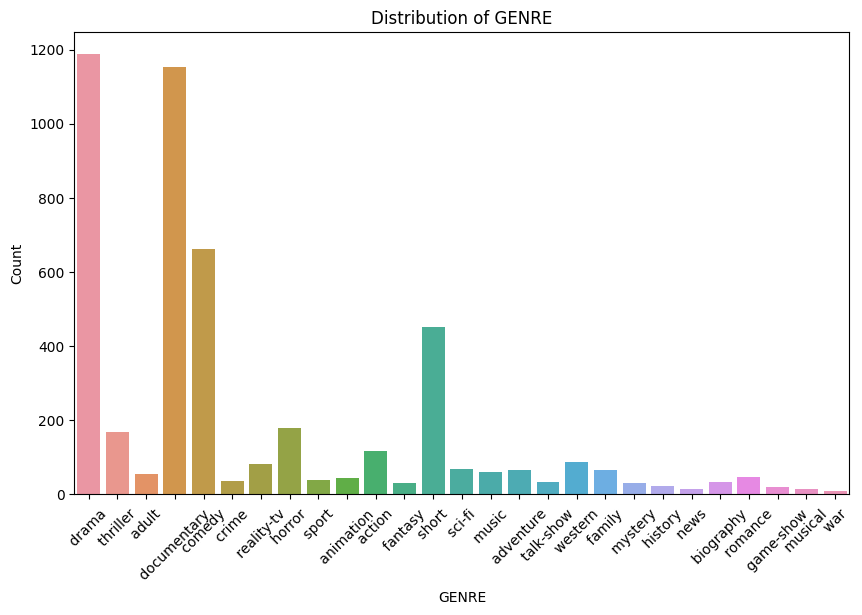

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GENRE', data=train_data)
plt.title('Distribution of GENRE')
plt.xlabel('GENRE')
plt.ylabel('Count as per categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

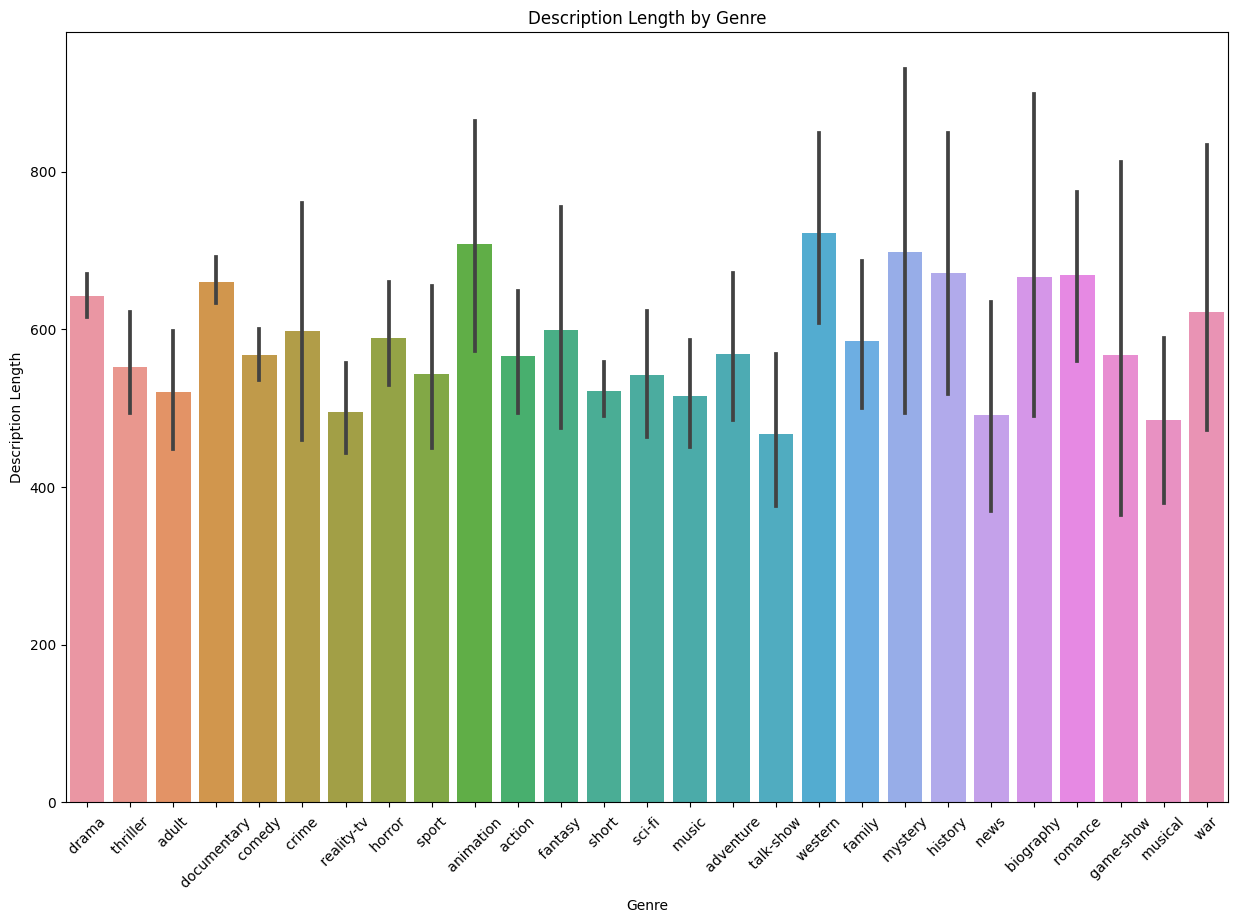

In [29]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

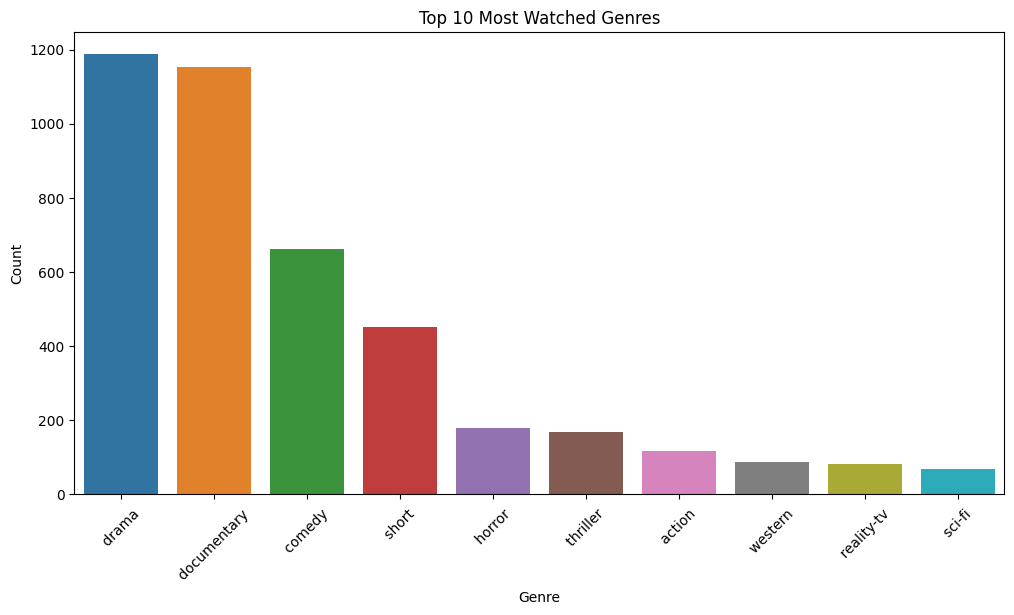

In [30]:
top_genres = train_data['GENRE'].value_counts().head(10)

# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Divinding the train and test data**

In [86]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

In [124]:
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data_solution['DESCRIPTION'])

In [111]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_data_solution['GENRE'])

In [112]:
# Split the data into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [113]:
clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

LinearSVC()

In [115]:
# Evaluate the model performance on the validation set
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.4900314795383001
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.07        26
           1       0.67      0.17      0.27        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.47      0.41      0.44       139
           6       0.00      0.00      0.00         4
           7       0.55      0.84      0.67       233
           8       0.45      0.72      0.55       229
           9       1.00      0.07      0.13        14
          10       0.00      0.00      0.00         4
          11       1.00      0.14      0.25         7
          12       0.00      0.00      0.00         3
          13       0.56      0.25      0.34        40
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
y_pred = clf.predict(X_test)

# Evaluate the model performance on the test set
print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Test Classification Report:\n", classification_report(y_test_encoded, y_pred))

Test Accuracy: 0.5082037893123189
Test Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.12      0.19      1017
           1       0.44      0.07      0.13       445
           2       0.52      0.15      0.23       591
           3       0.41      0.02      0.04       384
           4       1.00      0.01      0.01       200
           5       0.44      0.47      0.45      5714
           6       0.25      0.01      0.01       385
           7       0.58      0.84      0.68     10101
           8       0.48      0.71      0.57     10523
           9       0.37      0.02      0.04       614
          10       0.33      0.01      0.02       237
          11       0.86      0.36      0.51       133
          12       0.00      0.00      0.00       190
          13       0.57      0.38      0.46      1698
          14       0.64      0.28      0.39       582
          15       0.75      0.01      0.03       213
          16      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we are using Mnb classifier for text classification because it efficiently handles word counts or term frequencies, making it suitable for bag-of-words representations.

In [99]:
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [100]:
Mnb_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 8])

# **The final Output which the is the prediction of movie genre by giving a small description of the movie **

In [127]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "Small-town lives intersect, revealing deep secrets and conflicts."
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "Friendly game night takes a hilarious turn with family chaos and misinterpretations."
print(predict_movie(sample_descr_for_movie1))

 drama 
 comedy 
